In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
orders=pd.read_excel('Superstore.xls',sheet_name='Orders')
returns=pd.read_excel('Superstore.xls',sheet_name='Returns')
people=pd.read_excel('Superstore.xls',sheet_name='People')

In [3]:
Ords_Ret=pd.merge(orders,returns,how='outer').sort_values('Order Date')
Ords_Ret=Ords_Ret[["Category","Sales",'Order Date','Returned']]

In [4]:
Ords_Ret.groupby('Category').sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


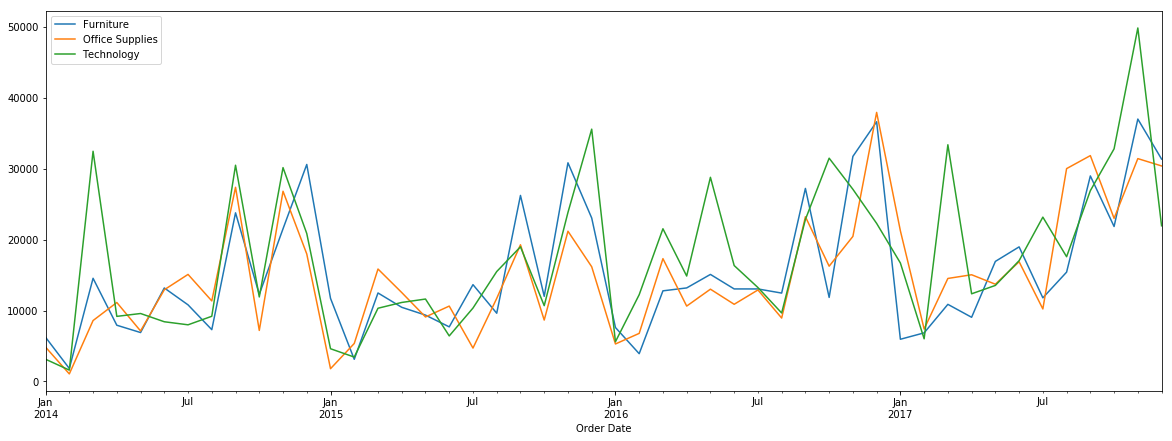

In [5]:
df=Ords_Ret.set_index('Order Date').groupby('Category').resample('M').sum().unstack(0)['Sales']
df.columns.name=''
df.plot(figsize=(20,7))
plt.show()

In [6]:
df.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2014-01-31,6242.525,4851.080,3143.290
2014-02-28,1839.658,1071.724,1608.510
2014-03-31,14573.956,8605.879,32511.174
2014-04-30,7944.837,11155.074,9195.434
2014-05-31,6912.787,7135.624,9599.876


In [7]:
furniture= df.Furniture
office = df['Office Supplies']
technology = df.Technology

In [8]:
decomposition_furniture = sm.tsa.seasonal_decompose(furniture, model='additive')
decomposition_tech = sm.tsa.seasonal_decompose(technology, model='additive')
decomposition_office = sm.tsa.seasonal_decompose(office, model='additive')

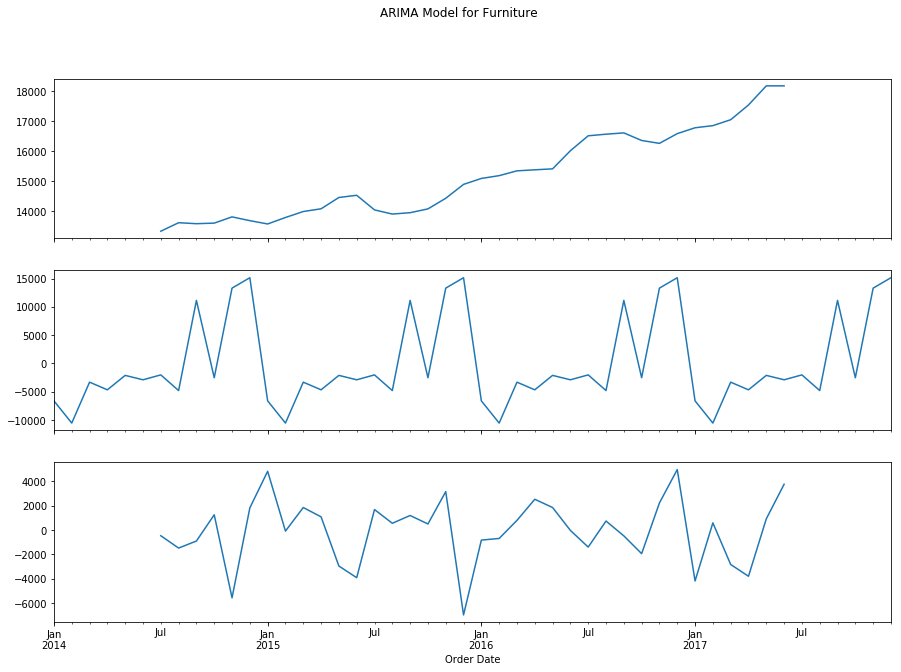

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10),sharex=True)
fig.suptitle('ARIMA Model for Furniture')
decomposition_furniture.trend.plot(ax=ax1)
decomposition_furniture.seasonal.plot(ax=ax2)
decomposition_furniture.resid.plot(ax=ax3)
plt.show()

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [60]:
bic=[]
aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #print(param,param_seasonal)
        try:
            mod = sm.tsa.statespace.SARIMAX(furniture,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            bic.append(results.bic)
            aic.append(results.aic)
            if results.aic < 500 and results.bic < 500:
                print('ARIMA{}x{} - AIC:{} - BIC: {}'.format(param, param_seasonal, results.aic,results.bic))
            #tmp=results.aic
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:475.92673489624383 - BIC: 478.2828425569397
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:476.78163414148827 - BIC: 480.3157956325321
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:465.6954505889745 - BIC: 467.9664390208328
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:456.76590120880013 - BIC: 460.1723838565876
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:457.4573714298997 - BIC: 460.86385407768717
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:461.2550644867574 - BIC: 465.79704135047405
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:444.1590804588871 - BIC: 447.43220781896207
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:439.1723099149964 - BIC: 443.53647972842964


In [61]:
bic=[]
aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #print(param,param_seasonal)
        try:
            mod = sm.tsa.statespace.SARIMAX(office,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            bic.append(results.bic)
            aic.append(results.aic)
            if results.aic < 500 and results.bic < 500:
                print('ARIMA{}x{} - AIC:{} - BIC: {}'.format(param, param_seasonal, results.aic,results.bic))
            #tmp=results.aic
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:486.7929479474993 - BIC: 489.0639363793576
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:479.27805449502887 - BIC: 482.68453714281634
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:482.41756661162145 - BIC: 485.8240492594089
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:480.30709015877505 - BIC: 484.8490670224917
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:464.23010870737886 - BIC: 467.5032360674538
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:460.86141074854316 - BIC: 465.2255805619764


In [62]:
bic=[]
aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #print(param,param_seasonal)
        try:
            mod = sm.tsa.statespace.SARIMAX(technology,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            bic.append(results.bic)
            aic.append(results.aic)
            if results.aic < 700 and results.bic < 700:
                print('ARIMA{}x{} - AIC:{} - BIC: {}'.format(param, param_seasonal, results.aic,results.bic))
            #tmp=results.aic
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:513.9511875826613 - BIC: 516.3072952433572
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:515.4553179921243 - BIC: 518.9894794831681
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:505.54562318515724 - BIC: 507.81661161701555
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:490.1579369221255 - BIC: 493.56441956991296
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:495.09648371751683 - BIC: 498.5029663653043
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:491.07658933543536 - BIC: 495.6185661991519
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:481.1455250319689 - BIC: 484.41865239204384
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:471.22824825315456 - BIC: 475.5924180665878


# Furniture
(1, 1, 1)x(1, 1, 0, 12)
# Office
(1, 1, 1)x(1, 1, 0, 12)
# Tech
(1, 1, 1)x(1, 1, 0, 12)

In [64]:
mod = sm.tsa.statespace.SARIMAX(furniture,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_furniture = mod.fit()

mod = sm.tsa.statespace.SARIMAX(office,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_office = mod.fit()

mod = sm.tsa.statespace.SARIMAX(technology,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_technology = mod.fit()

In [65]:
results_furniture.summary().tables[0]

Dep. Variable:,Furniture,No. Observations:,48
Model:,"SARIMAX(1, 1, 1)x(1, 1, 0, 12)",Log Likelihood,-215.586
Date:,"Tue, 21 Jan 2020",AIC,439.172
Time:,22:15:34,BIC,443.536
Sample:,01-31-2014,HQIC,440.200
,- 12-31-2017,,
Covariance Type:,opg,,


In [66]:
results_furniture.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.0956,0.429,-0.223,0.824,-0.936,0.745
ma.L1,-0.8562,0.232,-3.684,0.000,-1.312,-0.401
ar.S.L12,-0.3040,0.275,-1.104,0.269,-0.844,0.236
sigma2,2.809e+07,6.57e-10,4.28e+16,0.000,2.81e+07,2.81e+07


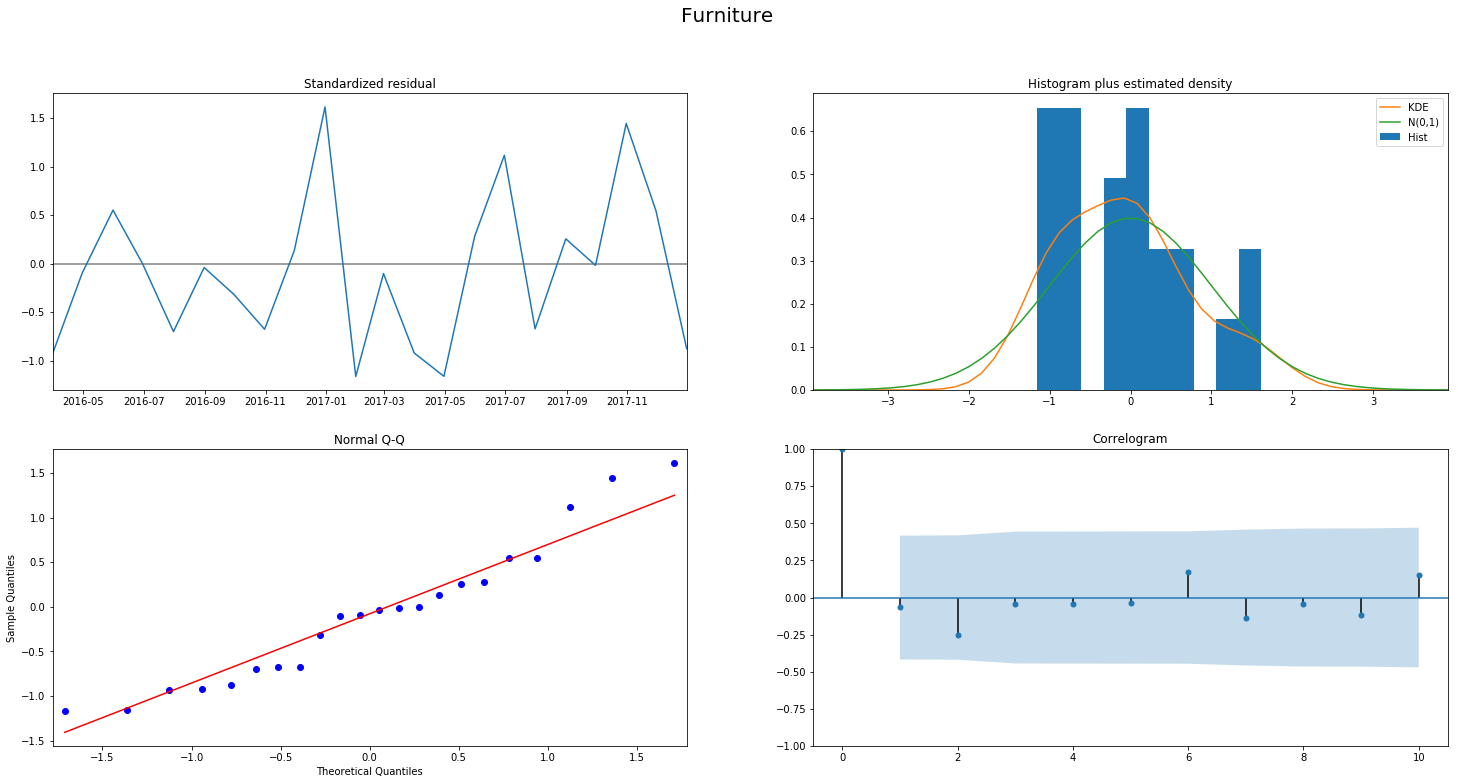

In [79]:
ax=results_furniture.plot_diagnostics(figsize=(25, 12),lags=10)
ax.suptitle('Furniture',fontsize=20)
plt.show()

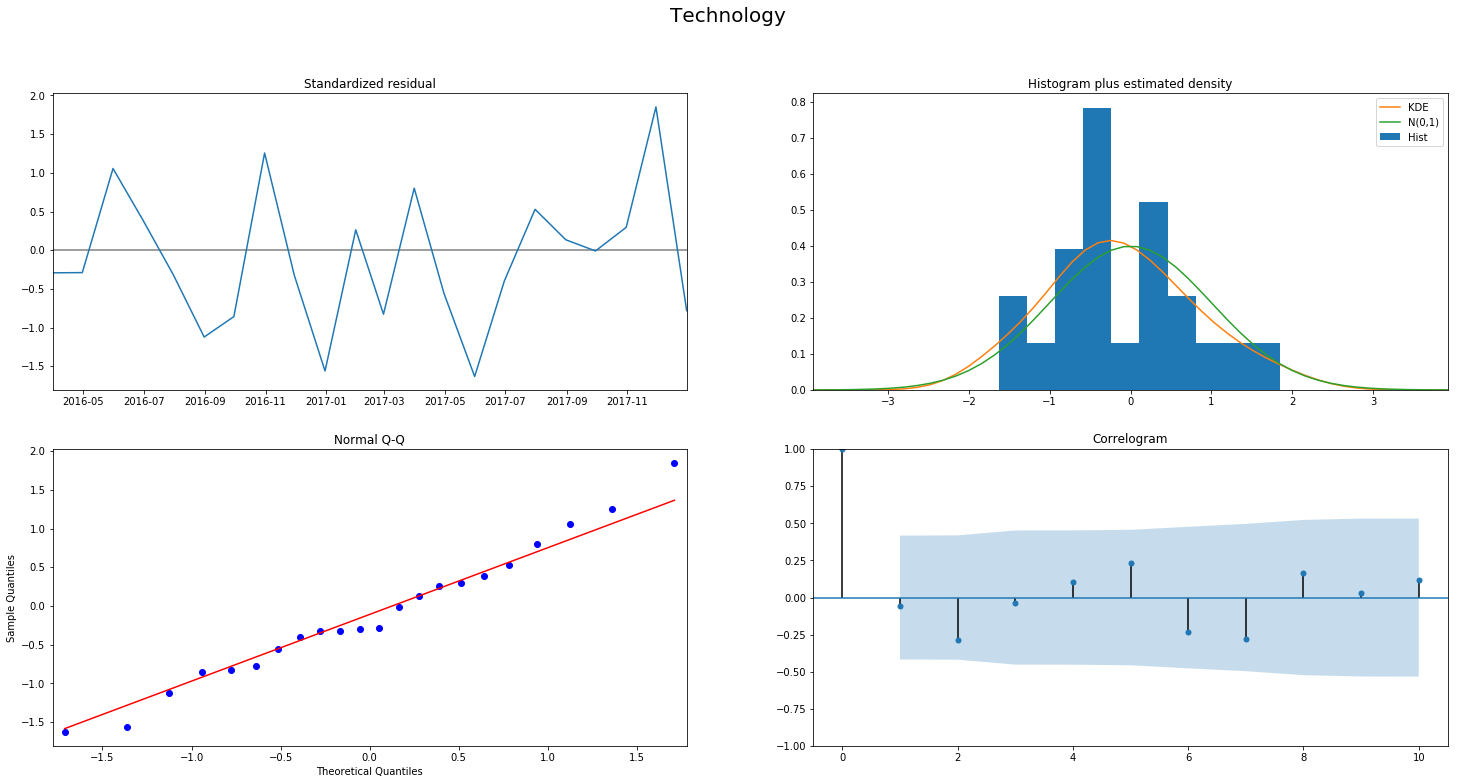

In [81]:
ax=results_technology.plot_diagnostics(figsize=(25, 12),lags=10)
ax.suptitle('Technology',fontsize=20)
plt.show()

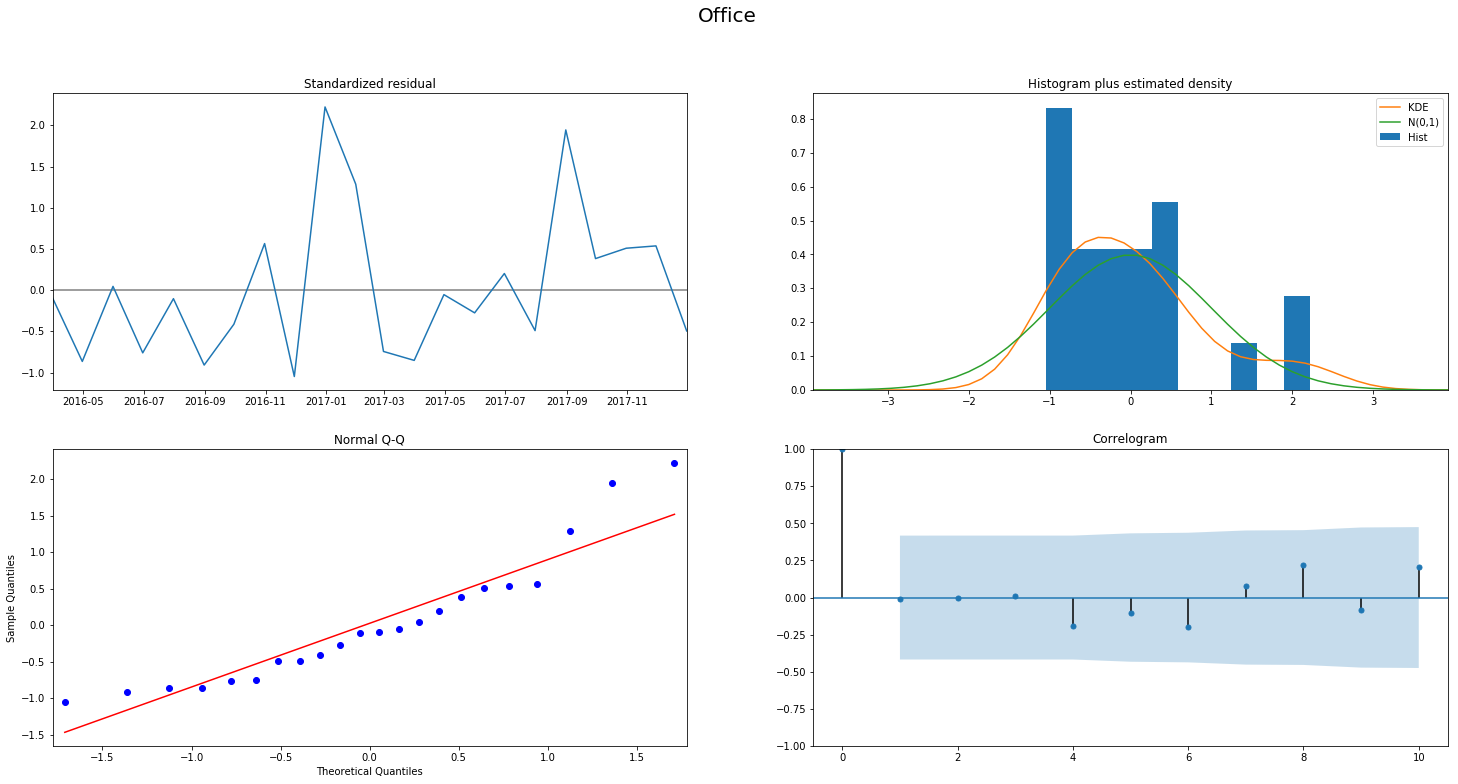

In [82]:
ax=results_office.plot_diagnostics(figsize=(25, 12),lags=10)
ax.suptitle('Office',fontsize=20)
plt.show()

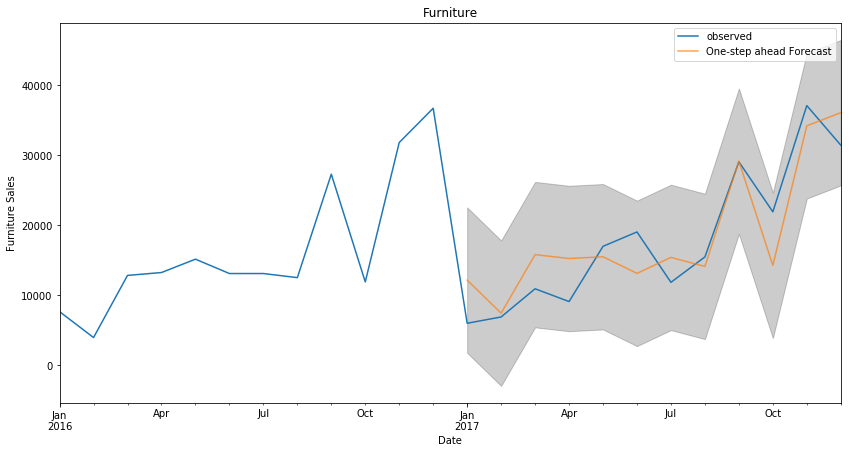

In [126]:
pred = results_furniture.get_prediction(start=36)
pred_ci = pred.conf_int()
ax = furniture['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.title('Furniture')
plt.show()

In [127]:
y_forecasted = pred.predicted_mean
y_truth = furniture['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('RMSE = {}'.format(round(np.sqrt(mse), 2)))

RMSE = 4472.07


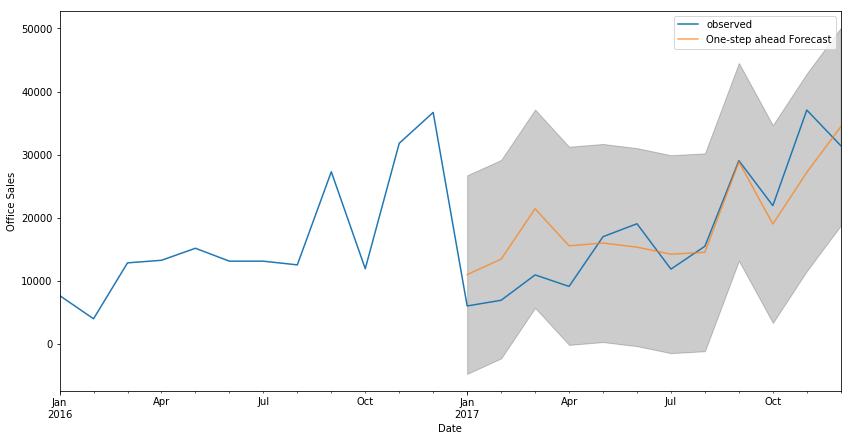

In [136]:
pred = results_office.get_prediction(start=36)
pred_ci = pred.conf_int()
ax = furniture['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Sales')
plt.legend()
#plt.title('Office')
plt.show()

In [137]:
y_forecasted = pred.predicted_mean
y_truth = furniture['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('RMSE = {}'.format(round(np.sqrt(mse), 2)))

RMSE = 5444.1


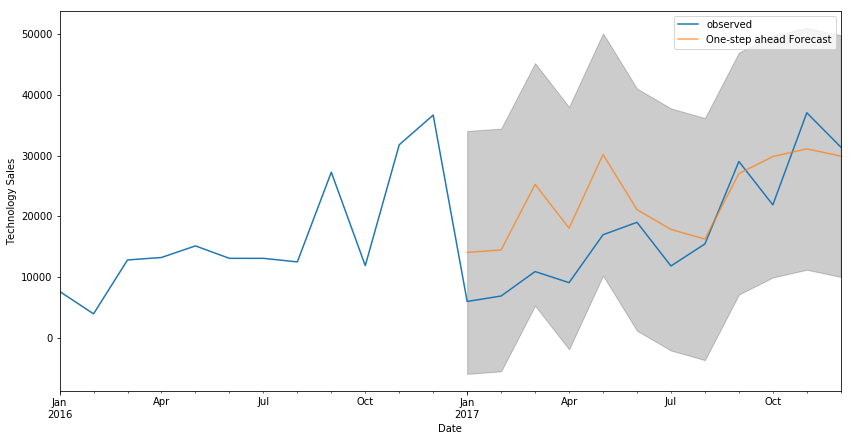

In [138]:
pred = results_technology.get_prediction(start=36)
pred_ci = pred.conf_int()
ax = furniture['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
#plt.title('Technology')
plt.show()

In [139]:
y_forecasted = pred.predicted_mean
y_truth = furniture['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('RMSE = {}'.format(round(np.sqrt(mse), 2)))

RMSE = 7802.94


In [61]:
import math


False

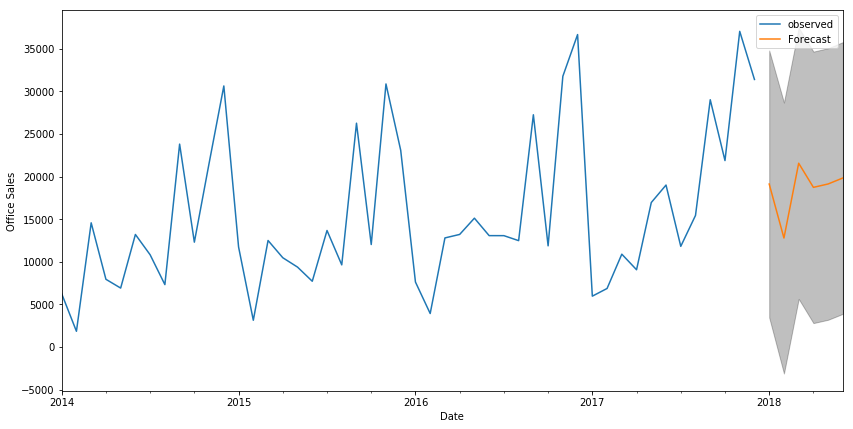

In [63]:
re[12]==re[12]

In [64]:
re[12]

numpy.float64

In [143]:
from fbprophet import Prophet

In [154]:
furniture=df.reset_index()[['Order Date', 'Furniture']]
furniture = furniture.rename(columns={'Order Date': 'ds', 'Furniture': 'y'})

In [204]:
Prophet?

In [205]:
furniture_model = Prophet(interval_width=0.95,seasonality_mode='additive')
furniture_model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
furniture_forecast = furniture_model.make_future_dataframe(periods=6, freq='M')
furniture_forecast = furniture_model.predict(furniture_forecast)

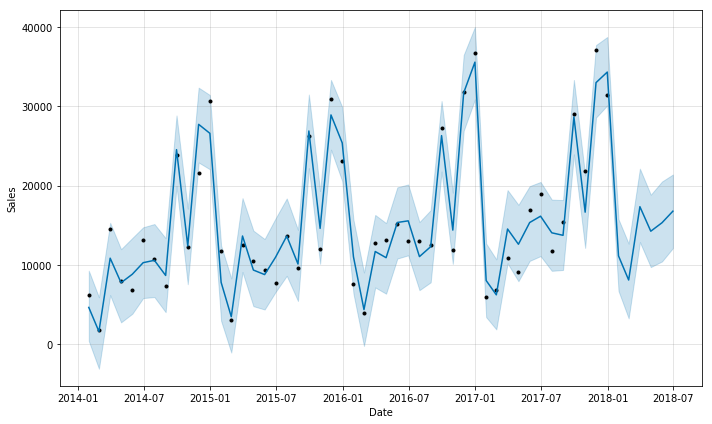

In [207]:
#plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.show()

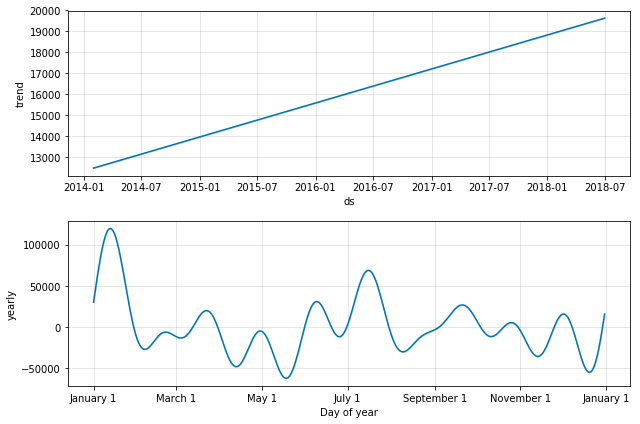

In [208]:
furniture_model.plot_components(furniture_forecast)
plt.show()